In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#creating a datafram
df=pd.read_csv(r'Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
151,Lucky,Yes,Yes,4.2/5,126,400,Dining
152,Nihao,No,Yes,2.9/5,72,200,other
153,Smocha,No,Yes,4.3/5,128,250,Cafes
154,Banana Leaf,Yes,Yes,3.7/5,685,200,Dining


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         156 non-null    object
 1   online_order                 156 non-null    object
 2   book_table                   156 non-null    object
 3   rate                         156 non-null    object
 4   votes                        156 non-null    int64 
 5   approx_cost(for two people)  156 non-null    int64 
 6   listed_in(type)              156 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.7+ KB


In [8]:
#converting rate datatype from object into float
df['rate']=df['rate'].str.split('/').str.get(0)
df['rate']=df['rate'].astype(float)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
151,Lucky,Yes,Yes,4.2,126,400,Dining
152,Nihao,No,Yes,2.9,72,200,other
153,Smocha,No,Yes,4.3,128,250,Cafes
154,Banana Leaf,Yes,Yes,3.7,685,200,Dining


In [11]:
#checking the datatype of rate
df['rate'].info

<bound method Series.info of 0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
151    4.2
152    2.9
153    4.3
154    3.7
155    4.8
Name: rate, Length: 156, dtype: float64>

Text(0, 0.5, 'No.of Restaurants in Different Category')

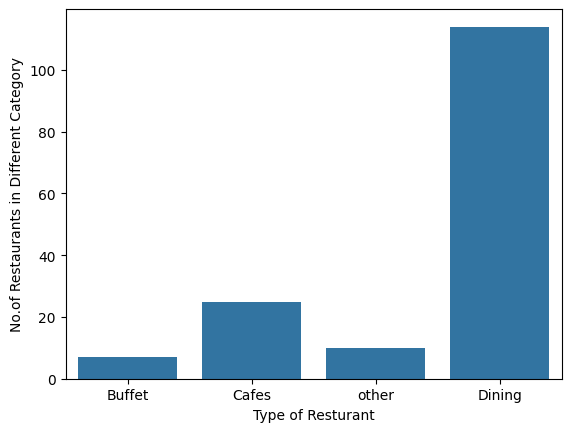

In [12]:
#1.What type of restaurant do the majority of customer order from

sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Resturant')
plt.ylabel('No.of Restaurants in Different Category')

Conclusion : Majority of the restaurants falls in dining Category.

2.How many votes has each type of restaurants received from customers?


Text(0, 0.5, 'Votes')

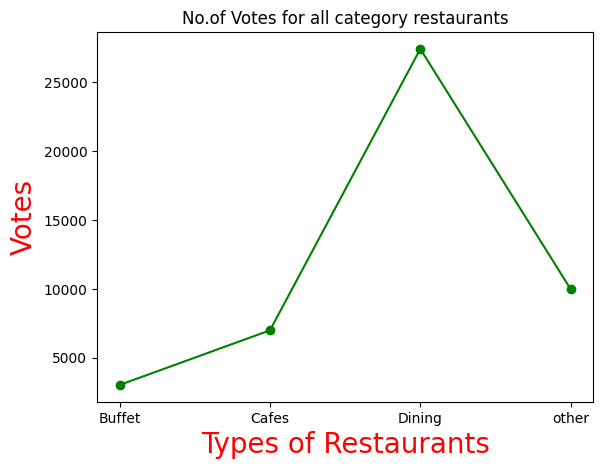

In [20]:
group_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})
plt.plot(result,c='g',marker='o')
plt.title('No.of Votes for all category restaurants')
plt.xlabel('Types of Restaurants',c='r',size=20)
plt.ylabel('Votes',c='r',size=20)

conclusion : Dining restaurants has received maximum votes.

3.What are the rating that majority of restaurants have received

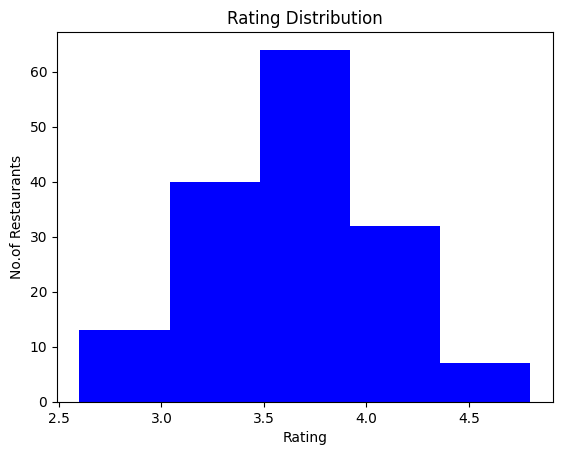

In [21]:
plt.hist(df['rate'], bins=5, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('No.of Restaurants')
plt.show()

Majority restaurants have received ratings from 3.5 to 4

4.Zomato has observed that most couple most of their food online. What is their average spendingon each order?


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

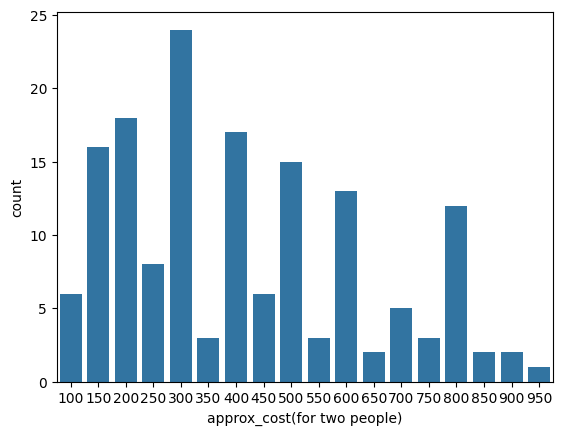

In [22]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

The majority of couple prefer restaurants with an approximate 300 rupees.

5.Which mode received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

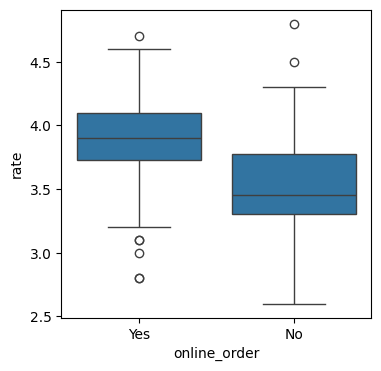

In [24]:
plt.figure(figsize=(4,4))
sns.boxplot(x='online_order', y='rate',data=df)

Conclusion: Online order receive higher rating as compared to offline order.

6.Which type of restaurants received more offline orders?


<function matplotlib.pyplot.show(close=None, block=None)>

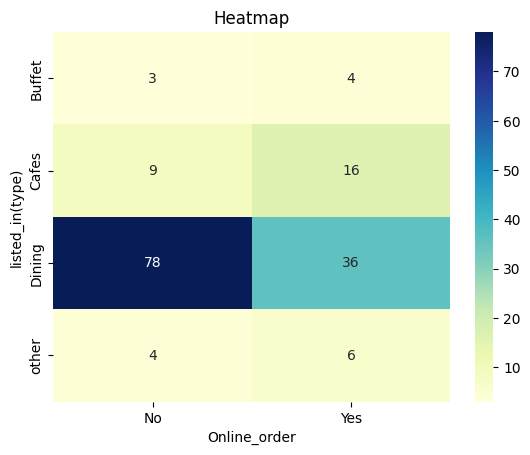

In [26]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot =True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online_order')
plt.ylabel('listed_in(type)')
plt.show

Finally we can say that, Dining restuarants primarly accept offline orders, whereas cafe primarly receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.